In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family'] = 'AppleGothic'

pd.set_option('display.max_columns', None)

plt.rcParams['font.family'] = 'DejaVu Sans'

In [27]:
ncd = pd.read_csv('/Users/user/Documents/진행중 업무/ncd_metering2.csv')

/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_14764/4125878327.py:1: DtypeWarning: Columns (31,35,36,41,43,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  ncd = pd.read_csv('/Users/user/Documents/진행중 업무/ncd_metering2.csv')


In [28]:
ncd = ncd[ncd['회원그룹코드']=='PATR']

In [29]:
def reverse_format_date(x):
    try:
        year, month, day = x.split('.')
        return round(int(f"{year}{int(month):02}{int(day):02}"))
    except (ValueError, AttributeError):
        return None


wp = ncd[ncd['plan']=='APP_T']
wp = wp[wp['회원그룹코드']!='INTL']
wp = wp.sort_values(by = ['회원번호','미터링일시'])
wp = wp.drop_duplicates(subset = ['회원번호','plan'] , keep = 'first')
wp = wp[['회원번호','regist_ymd','plan','전환여부','전환일']]
wp['regist_ymd'] = wp['regist_ymd'].apply(reverse_format_date)
wp['전환일'] = wp['전환일'].apply(reverse_format_date)
wp = wp[~(wp['전환일'] < wp['regist_ymd'])]
wp.loc[wp['전환일']-wp['regist_ymd']>100,'전환여부'] = 'N'
wp = wp.reset_index(drop=True)

In [30]:
wp_new_7_1 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202407')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=1)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=7)]
wp_new_7_2 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202407')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=8)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=14)]
wp_new_7_3 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202407')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=15)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=21)]
wp_new_7_4 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202407')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=22)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=28)]
wp_new_7_5 = wp[((wp['regist_ymd'].astype(str).str[0:6]=='202407')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=29)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=31))|
((wp['regist_ymd'].astype(str).str[0:6]=='202408')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=1)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=4))]

In [31]:
wp_new_8_1 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202408')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=5)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=11)]
wp_new_8_2 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202408')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=12)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=18)]
wp_new_8_3 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202408')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=19)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=25)]
wp_new_8_4 = wp[((wp['regist_ymd'].astype(str).str[0:6]=='202408')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=26)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=31))|
((wp['regist_ymd'].astype(str).str[0:6]=='202409')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=1)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=1))]

In [32]:
wp_new_9_1 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202409')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=2)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=8)]
wp_new_9_2 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202409')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=9)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=15)]
wp_new_9_3 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202409')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=16)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=22)]
wp_new_9_4 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202409')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=23)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=29)]
wp_new_9_5 = wp[((wp['regist_ymd'].astype(str).str[0:6]=='202409')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=30)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=30))|
((wp['regist_ymd'].astype(str).str[0:6]=='202410')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=1)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=6))]

In [33]:
wp_new_10_1 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202410')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=7)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=13)]
wp_new_10_2 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202410')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=14)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=20)]
wp_new_10_3 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202410')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=21)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=27)]
wp_new_10_4 = wp[((wp['regist_ymd'].astype(str).str[0:6]=='202410')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=28)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=31))|
((wp['regist_ymd'].astype(str).str[0:6]=='202411')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=1)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=3))]

In [34]:
wp_new_11_1 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202411')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=4)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=10)]
wp_new_11_2 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202411')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=11)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=17)]
wp_new_11_3 = wp[(wp['regist_ymd'].astype(str).str[0:6]=='202411')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=18)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=24)]
wp_new_11_4 = wp[((wp['regist_ymd'].astype(str).str[0:6]=='202411')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=25)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=30))|
((wp['regist_ymd'].astype(str).str[0:6]=='202412')&(wp['regist_ymd'].astype(str).str[-2:].astype(int)>=1)&(wp['regist_ymd'].astype(str).str[-2:].astype(int)<=1))]

In [35]:
list1 = []
list2 = [wp_new_7_1,wp_new_7_2,wp_new_7_3,wp_new_7_4,wp_new_7_5
         ,wp_new_8_1,wp_new_8_2,wp_new_8_3,wp_new_8_4
         ,wp_new_9_1,wp_new_9_2,wp_new_9_3,wp_new_9_4,wp_new_9_5
         ,wp_new_10_1,wp_new_10_2,wp_new_10_3,wp_new_10_4
         ,wp_new_11_1,wp_new_11_2,wp_new_11_3,wp_new_11_4]

In [36]:
for i in range(0,len(list2)) :
    a = list2[i]
    b = len(a[a['전환여부']=='Y'])/len(a)
    list1.append(b)

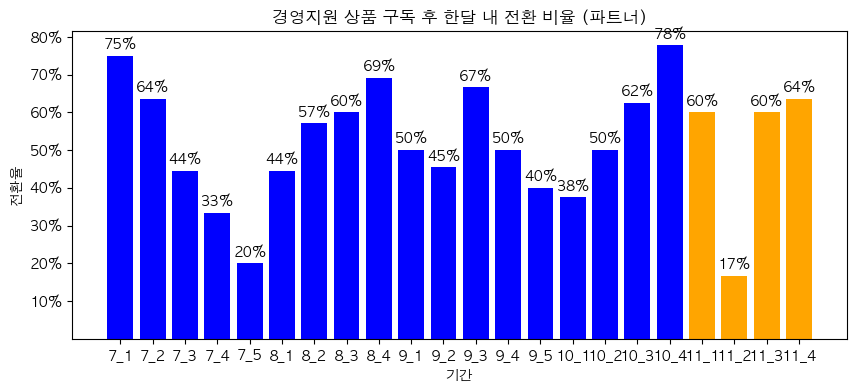

In [49]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(10, 4))

values = list1
labels = ['7_1','7_2','7_3','7_4','7_5','8_1','8_2','8_3','8_4','9_1','9_2','9_3','9_4','9_5','10_1','10_2','10_3','10_4','11_1','11_2','11_3','11_4']

colors = ['blue'] * (len(values) - 4) + ['orange', 'orange', 'orange','orange']

plt.bar(labels, values, color=colors)

plt.title('경영지원 상품 구독 후 한달 내 전환 비율 (파트너)')
plt.xlabel('기간')
plt.ylabel('전환율')

y_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
y_labels = ['10%','20%','30%','40%','50%','60%','70%','80%']
plt.yticks(y_values, y_labels)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v*100))+'%', ha='center', va='bottom')

plt.show()


In [81]:
before = []
after = []

for i in range(1,32) :
    a = wp[wp['regist_ymd']==20240700+i]
    if (len(a)<3) :
        continue
    b = len(a[a['전환여부']=='Y'])/len(a)
    before.append(b)
for i in range(1,32) :
    a = wp[wp['regist_ymd']==20240800+i]
    if (len(a)<3) :
        continue
    b = len(a[a['전환여부']=='Y'])/len(a)
    before.append(b)
for i in range(1,31) :
    a = wp[wp['regist_ymd']==20240900+i]
    if (len(a)<3) :
        continue
    b = len(a[a['전환여부']=='Y'])/len(a)
    before.append(b)
for i in range(1,32) :
    a = wp[wp['regist_ymd']==20241000+i]
    if (len(a)<3) :
        continue
    b = len(a[a['전환여부']=='Y'])/len(a)
    before.append(b)
for i in range(1,4) :
    a = wp[wp['regist_ymd']==20241100+i]
    if (len(a)<3) :
        continue
    b = len(a[a['전환여부']=='Y'])/len(a)
    before.append(b)

for i in range(4,31) :
    a = wp[wp['regist_ymd']==20241100+i]
    if (len(a)<3) :
        continue
    b = len(a[a['전환여부']=='Y'])/len(a)
    after.append(b)

for i in range(1,2) :
    a = wp[wp['regist_ymd']==20241200+i]
    if (len(a)<3) :
        continue
    b = len(a[a['전환여부']=='Y'])/len(a)
    after.append(b)

In [109]:
import random
import numpy as np
np.random.seed(123)
group1 = random.sample(before, 26)
group2 = after

In [111]:
a = pd.DataFrame({'before':group1,'after':group2})
a

,before,after
0,0.083333,0.416667
1,0.000000,0.266667
2,0.200000,0.375000
3,0.352941,0.200000
4,0.333333,0.000000
5,0.187500,0.000000
6,0.125000,0.066667
7,0.181818,0.200000
8,0.000000,0.333333
9,0.090909,0.166667


In [113]:
from scipy.stats import shapiro
import numpy as np
import random

stat1, p1 = shapiro(group1)
stat2, p2 = shapiro(group2)

print(f"before - Shapiro Test: Statistic = {stat1:.4f}, P-value = {p1:.4f}")
print(f"after - Shapiro Test: Statistic = {stat2:.4f}, P-value = {p2:.4f}")

alpha = 0.05
if p1 > alpha:
    print("before: 정규성 충족")
else:
    print("before: 정규성 불충족")

if p2 > alpha:
    print("after: 정규성 충족")
else:
    print("after: 정규성 불충족")

before - Shapiro Test: Statistic = 0.8694, P-value = 0.0035
after - Shapiro Test: Statistic = 0.9382, P-value = 0.1220
before: 정규성 불충족
after: 정규성 충족


/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_1786/3468794864.py:30: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_1786/3468794864.py:30: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_1786/3468794864.py:30: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_1786/3468794864.py:30: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_1786/3468794864.py:30: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1,

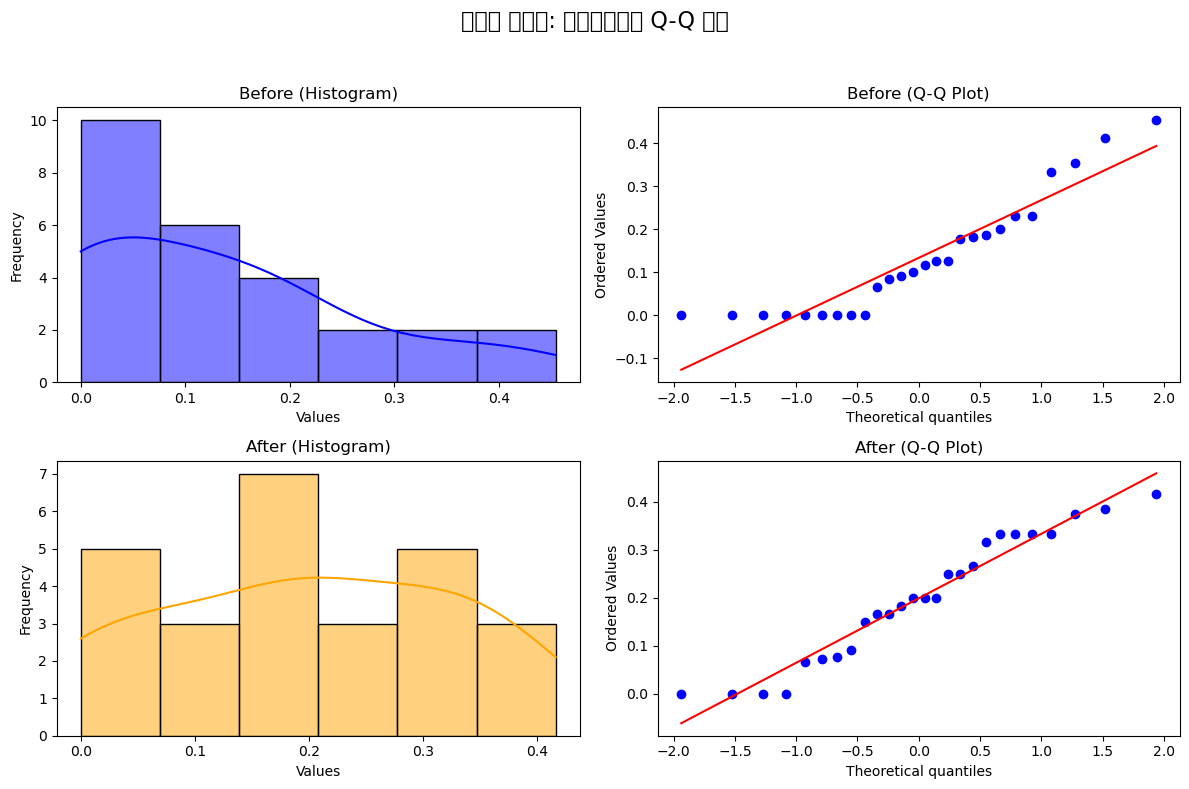

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("정규성 시각화: 히스토그램과 Q-Q 플롯", fontsize=16)

sns.histplot(group1, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Before (Histogram)")
axes[0, 0].set_xlabel("Values")
axes[0, 0].set_ylabel("Frequency")

stats.probplot(group1, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Before (Q-Q Plot)")

sns.histplot(group2, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title("After (Histogram)")
axes[1, 0].set_xlabel("Values")
axes[1, 0].set_ylabel("Frequency")

stats.probplot(group2, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("After (Q-Q Plot)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [117]:
from scipy.stats import levene

stat, p = levene(group1, group2)

print(f"Levene's Test: Statistic = {stat:.4f}, P-value = {p:.4f}")

if p > alpha:
    print("두 그룹은 분산이 동일하다. (등분산성 충족)")
else:
    print("두 그룹은 분산이 동일하지 않다. (등분산성 불충족)")

Levene's Test: Statistic = 0.0036, P-value = 0.9522
두 그룹은 분산이 동일하다. (등분산성 충족)


/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_1786/3489177496.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='values', data=data, palette={'before': 'skyblue', 'after': 'orange'}, width=0.6)


<Figure size 1000x600 with 0 Axes>

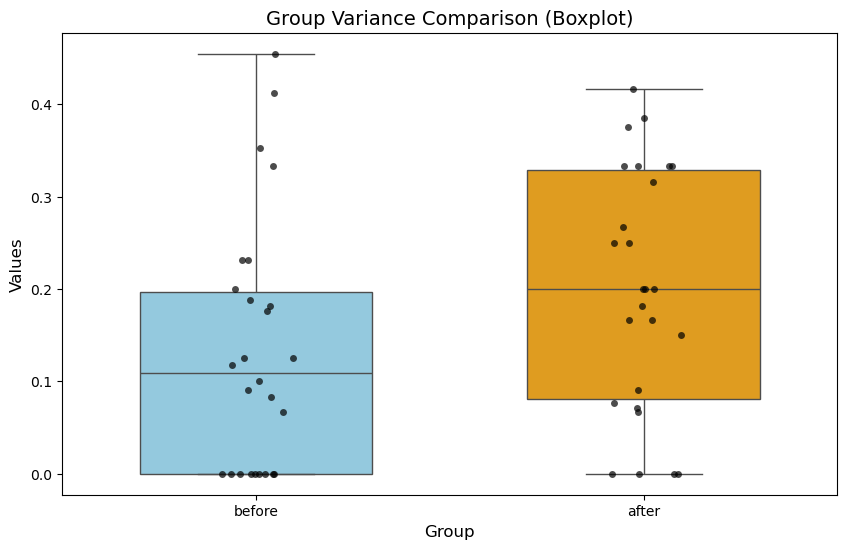

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

before = group1
after = group2
data = {'group': ['before'] * len(before) + ['after'] * len(after),
        'values': before + after}

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='values', data=data, palette={'before': 'skyblue', 'after': 'orange'}, width=0.6)
sns.stripplot(x='group', y='values', data=data, color='black', alpha=0.7, jitter=True)
plt.title("Group Variance Comparison (Boxplot)", fontsize=14)
plt.xlabel("Group", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.show()


In [125]:
import numpy as np
from scipy.stats import ttest_ind, shapiro, levene

before = group1
after = group2

t_stat, p_val = ttest_ind(before, after, equal_var=True)  # equal_var=False for Welch’s t-test
print("=== T 검정 결과 ===")
print(f"T statistic = {t_stat:.4f}")
print(f"P-value = {p_val:.4f}")

if p_val <= 0.05:
    print("귀무가설 기각: 온보딩 메일 발송 전후 전환율 차이가 유의함.")
else:
    print("귀무가설 채택: 온보딩 메일 발송 전후 전환율 차이가 유의하지 않음.")

=== T 검정 결과 ===
T statistic = -1.7500
P-value = 0.0863
귀무가설 채택: 온보딩 메일 발송 전후 전환율 차이가 유의하지 않음.


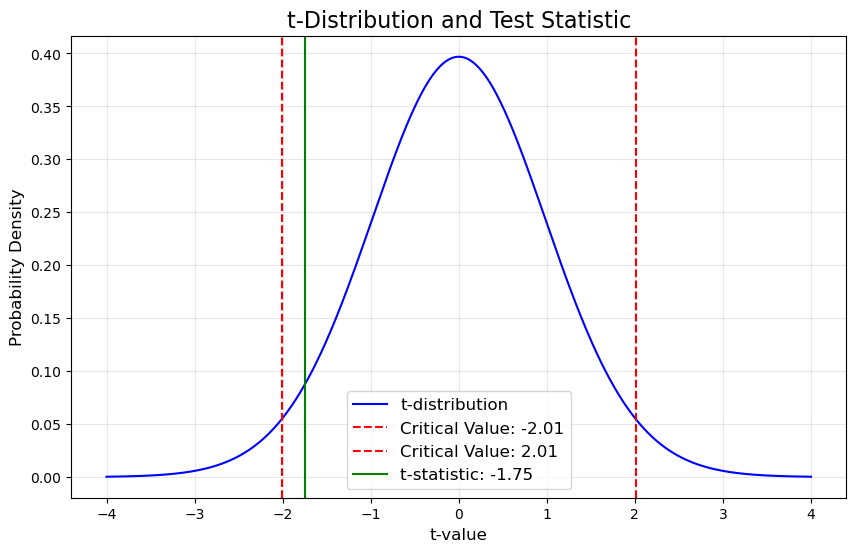

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

df = len(before) + len(after) - 2
t_stat, p_val = ttest_ind(before, after, equal_var=True)
alpha = 0.05

x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution', color='blue')

t_crit = t.ppf(1 - alpha / 2, df)
plt.axvline(-t_crit, color='red', linestyle='--', label=f'Critical Value: {-t_crit:.2f}')
plt.axvline(t_crit, color='red', linestyle='--', label=f'Critical Value: {t_crit:.2f}')

plt.axvline(t_stat, color='green', linestyle='-', label=f't-statistic: {t_stat:.2f}')

plt.title("t-Distribution and Test Statistic", fontsize=16)
plt.xlabel("t-value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [129]:
from scipy.stats import shapiro, mannwhitneyu

stat_mw, p_mw = mannwhitneyu(before, after, alternative='two-sided')

print("=== 비모수 검정 결과 ===")
print(f"Mann-Whitney U statistic = {stat_mw:.4f}")
print(f"P-value = {p_mw:.4f}")
if p_mw <= 0.05:
    print("귀무가설 기각: 온보딩 메일 발송 전후 전환율 차이가 유의함.")
else:
    print("귀무가설 채택: 온보딩 메일 발송 전후 전환율 차이가 유의하지 않음.")

=== 비모수 검정 결과 ===
Mann-Whitney U statistic = 242.0000
P-value = 0.0779
귀무가설 채택: 온보딩 메일 발송 전후 전환율 차이가 유의하지 않음.
